In [1]:
from src.image_filter import ImageFilter
from src.visualizer import Visualizer
from src.camera import Camera

import numpy as np
import pickle
import glob
import cv2

In [2]:
calibration_data = pickle.load(open("calibration_data.p", "rb" ))
calibration_data

{'camera_matrix': array([[1.15777818e+03, 0.00000000e+00, 6.67113856e+02],
        [0.00000000e+00, 1.15282217e+03, 3.86124584e+02],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 'distortion_coefficient': array([[-0.24688507, -0.02373153, -0.00109831,  0.00035107, -0.00259872]])}

In [3]:
prespective_data = pickle.load(open("prespective_data.p", "rb" ))
prespective_data

{'car_points': [(580, 460), (205, 720), (1110, 720), (703, 460)],
 'bird_points': [(320, 0), (320, 720), (960, 720), (960, 0)]}

In [4]:
camera = Camera(calibration_data, prespective_data['car_points'], prespective_data['bird_points'])
visualizer = Visualizer()

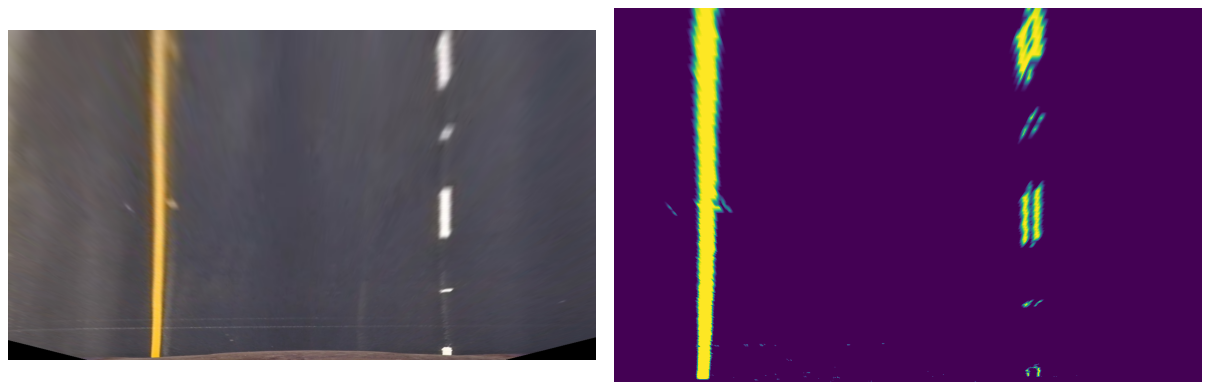

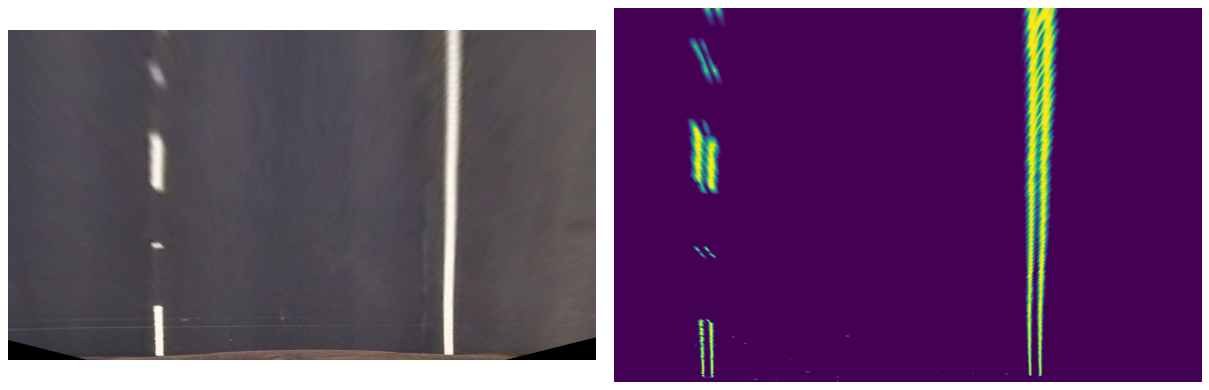

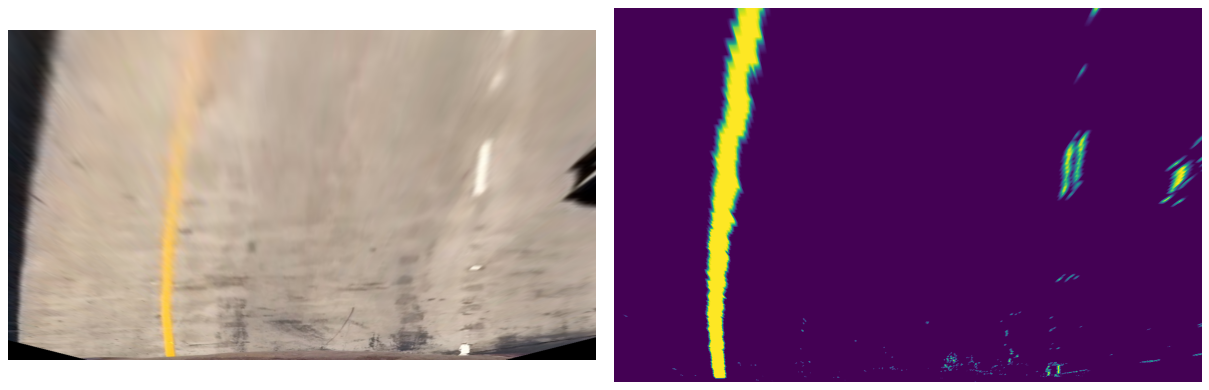

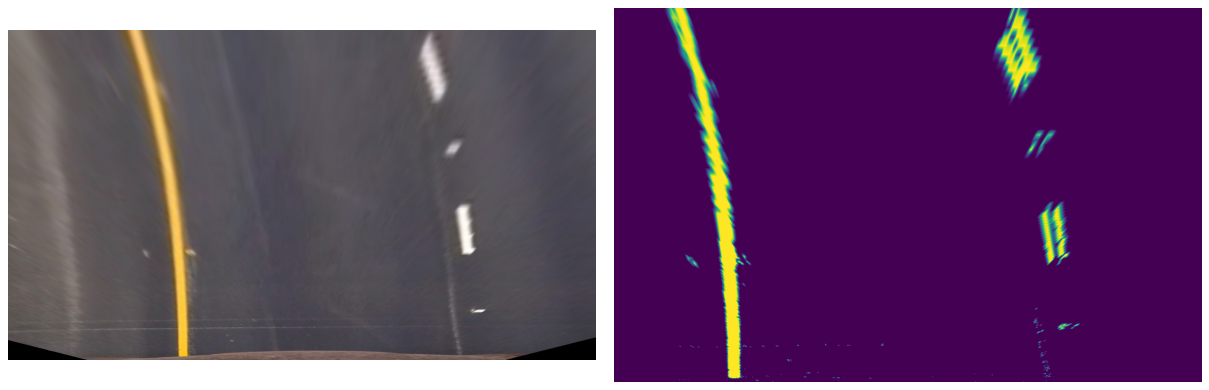

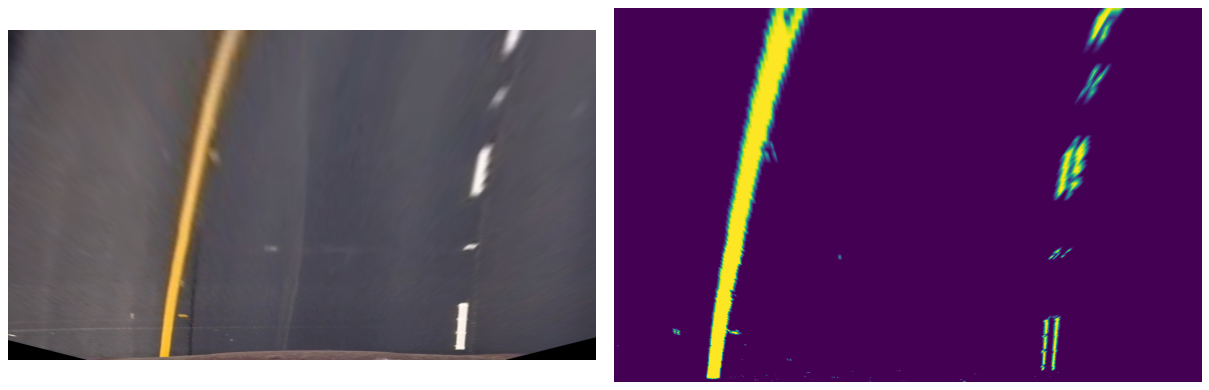

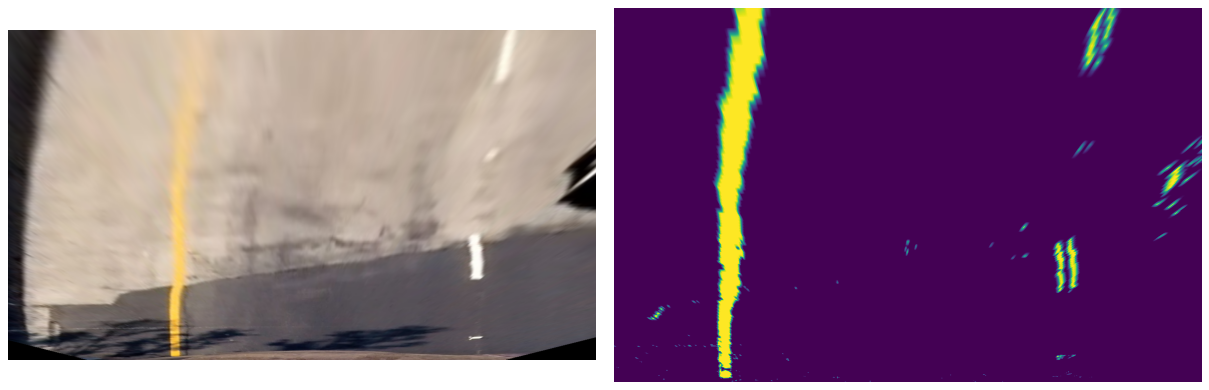

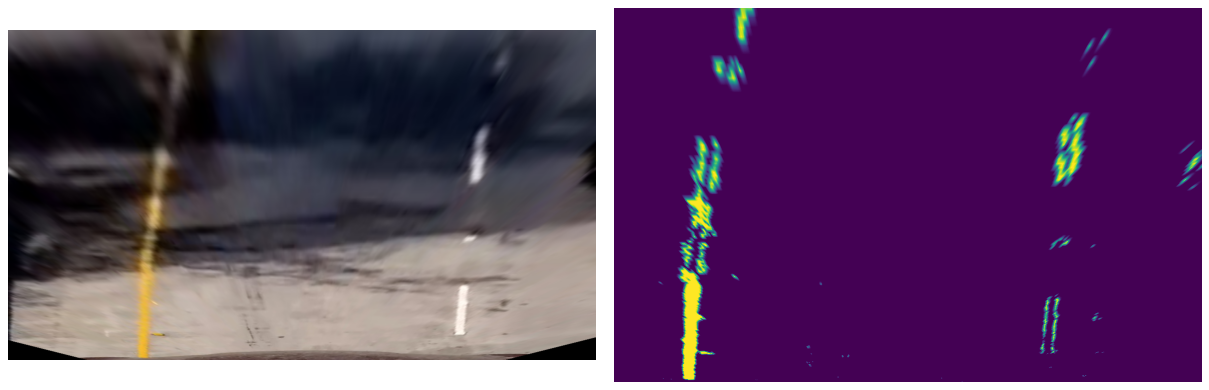

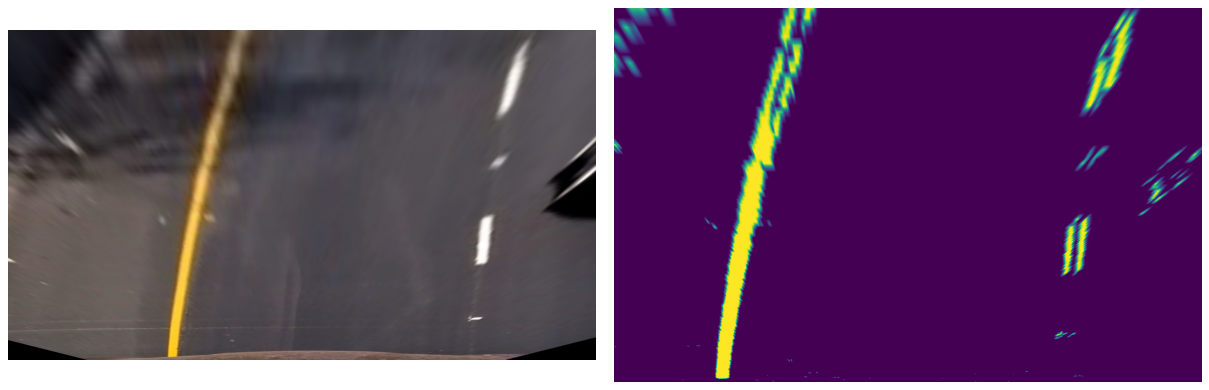

In [5]:
filter_dict = {
    'color1_min_threshold':40,        'color1_max_threshold':205,
    'color2_min_threshold':120,        'color2_max_threshold':255,
    'magnitude_min_threshold':20,
    'absolute_min_threshold' : 40,
    'direction_min_threshold':0.7,    'direction_max_threshold':1.4,
    'kernal_size':3
}
image_filter = ImageFilter(threshold_dict=filter_dict)

images_path = glob.glob('../test_images/*.jpg')
for image_path in images_path:
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    filtered_image, mask = image_filter.get_binary_image(image)
    bird_view = camera.get_bird_view(filtered_image)
    
    bird_view = bird_view[:, 150:]


    bird_view_org = camera.get_bird_view(image)
    visualizer.show_images(imgs=[bird_view_org, bird_view], per_row = 2, per_col = 1, W = 15, H = 5)


In [6]:
pickle.dump(filter_dict, open("filter_data.p", "wb"))